# Matplotlib

In [3]:
import matplotlib.pyplot as plt
import numpy as np

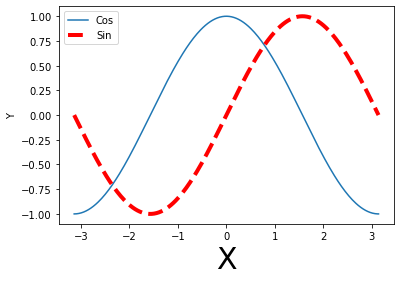

In [273]:
X = np.linspace(-np.pi, np.pi, 256)
C, S = np.cos(X), np.sin(X)
plt.plot(X, C, label='Cos')
plt.plot(X, S, label='Sin', c='r', linestyle='--', linewidth=4)
plt.xlabel('X', fontsize=30)
plt.ylabel('Y',fontsize=30)
plt.legend()
plt.show()

# Exercise on Numpy and Matplotlib

The data in [populations.txt](http://www.scipy-lectures.org/_downloads/populations.txt) describes the populations of hares, lynxes and carrots in northern Canada during 20 years. Get the data with ```np.loadtxt``` and do the following exercises **without for-loops**.


Plot the populations for the years in the period. Add legend and axis labels to the plot.

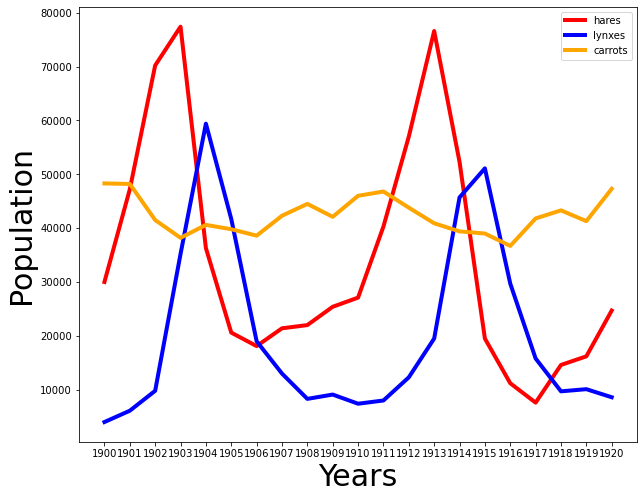

In [19]:
import matplotlib.pyplot as plt
import numpy as np
fname = "populations.txt"
years = np.loadtxt(fname, usecols=(0))
hares = np.loadtxt(fname, usecols=(1))
lynxes = np.loadtxt(fname, usecols=(2))
carrots = np.loadtxt(fname, usecols=(3))
plt.figure(figsize=(10,8))
plt.plot(years, hares, label='hares', c='r', linewidth=4)
plt.plot(years, lynxes, label='lynxes', c='b', linewidth=4)
plt.plot(years, carrots, label='carrots', c='orange', linewidth=4)
plt.xticks(years.astype(int))
plt.xlabel('Years', fontsize=30)
plt.ylabel('Population',fontsize=30)
plt.legend()
plt.show()


Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for the years in the period.

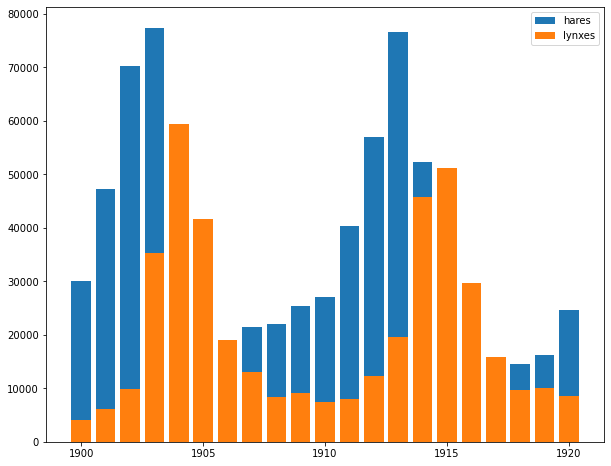

In [275]:
plt.figure(figsize=(10,8))
plt.bar(years, hares, label='hares')
plt.bar(years, lynxes, label='lynxes')
plt.legend()
plt.show()

Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Arrange 3 subplots in a row.

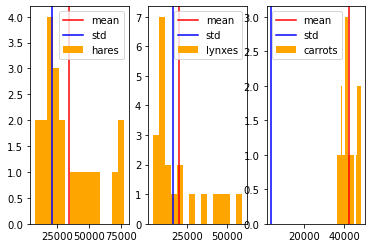

In [276]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.hist(hares, bins = 15, label = 'hares', color = 'orange')
ax1.axvline(hares.mean(), c = 'r', label = 'mean')
ax1.axvline(hares.std(), c = 'b', label = 'std')
ax1.legend()

ax2.hist(lynxes, bins = 15, label = 'lynxes', color = 'orange')
ax2.axvline(lynxes.mean(), c = 'r', label = 'mean')
ax2.axvline(lynxes.std(), c = 'b', label = 'std')
ax2.legend()

ax3.hist(carrots, bins = 15, label = 'carrots', color = 'orange')
ax3.axvline(carrots.mean(), c = 'r', label = 'mean')
ax3.axvline(carrots.std(), c = 'b', label = 'std')
ax3.legend()

plt.show()

Find which year each species had the largest population. Mark these years in the plot of populations.

In [277]:
np.max([hares,lynxes,carrots],axis=1)

array([77400., 59400., 48300.])

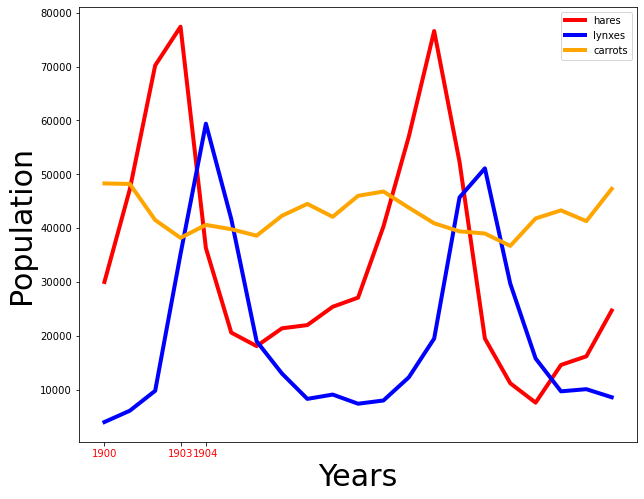

In [278]:
i = [np.argmax(hares),np.argmax(lynxes),np.argmax(carrots)]

plt.figure(figsize=(10,8))
plt.plot(years, hares, label='hares', c='r', linewidth=4)
plt.plot(years, lynxes, label='lynxes', c='b', linewidth=4)
plt.plot(years, carrots, label='carrots', c='orange', linewidth=4)
plt.xticks(years[i], c = 'red')
plt.xlabel('Years', fontsize=30)
plt.ylabel('Population',fontsize=30)
#plt.scatter(years[i], np.max([hares,lynxes,carrots],axis=1), linewidths = 10, c = 'black')
plt.legend()
plt.show()

Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing ratio of "H" and "L" values obtained.

['H' 'H' 'H' 'H' 'L' 'L' 'L' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'L' 'L' 'L'
 'H' 'H' 'H']


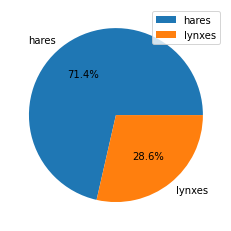

In [279]:
res = np.argmax([hares,lynxes],axis=0)
print(np.where(res == 0, 'H', 'L'))
res = np.bincount(res)
plt.pie(res,labels=('hares','lynxes'),autopct='%1.1f%%')
plt.legend()
plt.show()

Find which years any of the populations is above 50000. Show time periods where populations are above 50000
in the plot of populations.

[1902. 1903. 1904. 1912. 1913. 1914. 1915.]


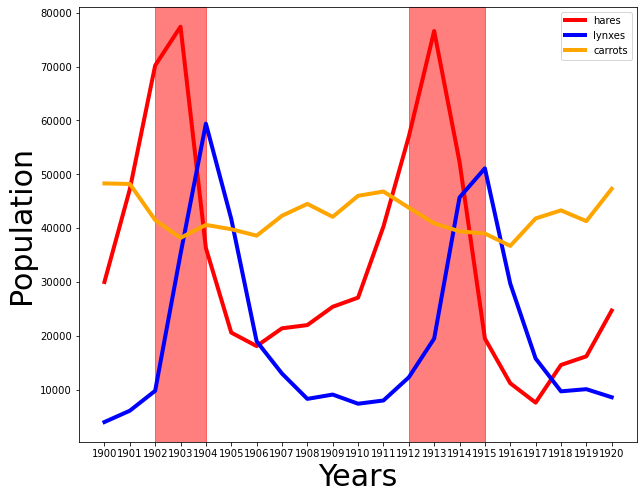

In [329]:
x = np.max([hares,lynxes,carrots],axis=0)
index=np.arange(len(years))
index=np.extract(x>50000,index)
print(years[index])

plt.figure(figsize=(10,8))
plt.plot(years, hares, label='hares', c='r', linewidth=4)
plt.plot(years, lynxes, label='lynxes', c='b', linewidth=4)
plt.plot(years, carrots, label='carrots', c='orange', linewidth=4)
plt.xticks(years.astype(int))
plt.xlabel('Years', fontsize=30)
plt.ylabel('Population',fontsize=30)
plt.axvspan(1902, 1904, color='red', alpha=0.5)
plt.axvspan(1912, 1915, color='red', alpha=0.5)
plt.legend()
plt.show()


Find the top 2 years for each species when they had the lowest populations.

In [311]:
min1 = np.argmin(lynxes)
index = np.arange(0,len(years))
index = np.extract(lynxes > np.min(lynxes), index)
min2 = np.extract(lynxes[index]==np.min(lynxes[index]),index)[0]
print('lynxes', years[[min1,min2]])
min1 = np.argmin(hares)
index = np.arange(0,len(years))
index = np.extract(hares > np.min(hares), index)
min2 = np.extract(hares[index]==np.min(hares[index]),index)[0]
print('hares', years[[min1,min2]])
min1 = np.argmin(carrots)
index = np.arange(0,len(years))
index = np.extract(carrots > np.min(carrots), index)
min2 = np.extract(carrots[index]==np.min(carrots[index]),index)[0]
print('carrots', years[[min1,min2]])

lynxes [1900. 1901.]
hares [1917. 1916.]
carrots [1916. 1903.]


Plot the change in hare population and the number of lynxes. Find the correlation coefficient.

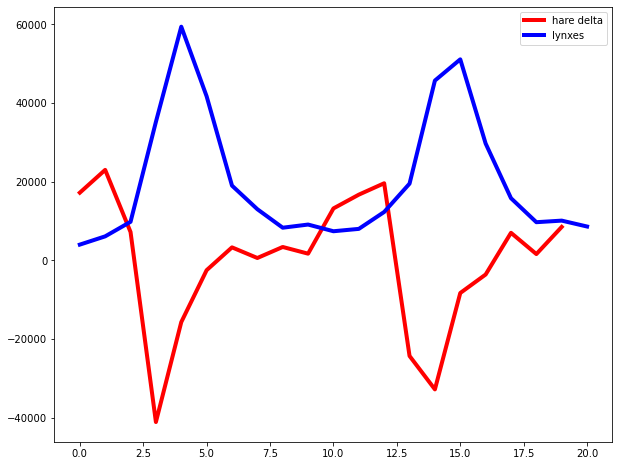

In [365]:
plt.figure(figsize=(10,8))
plt.plot(np.diff(hares), label='hare delta', c = 'red', linewidth=4)
plt.plot(lynxes, label='lynxes', c='b', linewidth=4)
plt.legend()
plt.show()

In [325]:
np.corrcoef(np.diff(hares),lynxes[:-1])

array([[ 1.        , -0.69334852],
       [-0.69334852,  1.        ]])

Show population of hares vs carrots and hares vs lynxes.

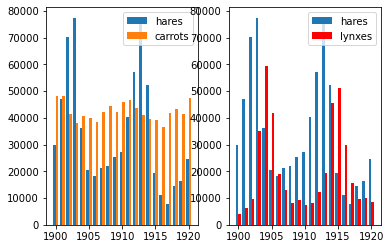

In [20]:
fig, (ax1,ax2)= plt.subplots(1,2)
ax1.bar(years-0.2, hares, label='hares', width = 0.4)
ax2.bar(years-0.2, hares, label='hares', width = 0.4)
ax2.bar(years+0.2, lynxes, label='lynxes', c = 'r', width = 0.4)
ax1.bar(years+0.2, carrots, label='carrots', width = 0.4)
ax1.legend()
ax2.legend()
plt.show()

Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value with the true value and print a ratio of the error to the true value.

Вообще, можно было бы взять медиану hares, но я предпочла предположить, что lynxes[i+1]=-hare delta[i]+20000, что видно из ранее построенного графика. 

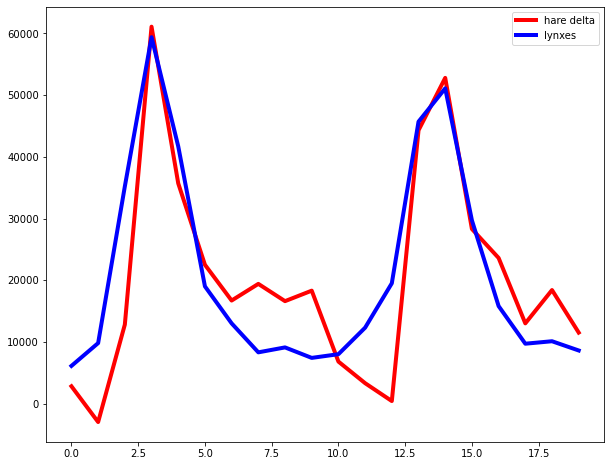

In [367]:
plt.figure(figsize=(10,8))
plt.plot(-np.diff(hares)+20000, label='hare delta', c = 'red', linewidth=4)
plt.plot(lynxes[1:], label='lynxes', c='b', linewidth=4)
plt.legend()
plt.show()

In [370]:
import math
hares_20= -lynxes[20]+hares[19]+20000
print(hares_20, hares[20])
print(abs(hares_20-hares[20])/hares[20])


27600.0 24700.0
0.11740890688259109


2) Plot a graph of total explained variance vs number of principal components

In [5]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
digits = fetch_openml('mnist_784')

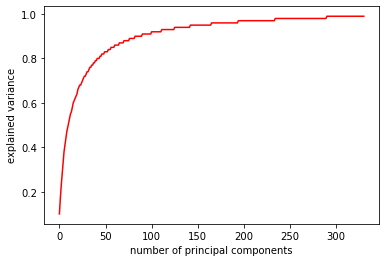

In [11]:
pca = PCA(n_components=0.99, svd_solver='full')
pca.fit_transform(digits.data.astype(float))
plt.plot(pca.explained_variance_ratio_.cumsum().round(2),c='r')
plt.xlabel('number of principal components')
plt.ylabel('explained variance')
plt.show()

3) Find a number of principal components for 99%, 95%, 90%, and 85% of explained variance.

In [13]:
pca = PCA(n_components=0.99, svd_solver='full')
X_transformed = pca.fit_transform(digits.data.astype(float))
print('99% - ', X_transformed.shape[1])
pca = PCA(n_components=0.95, svd_solver='full')
X_transformed = pca.fit_transform(digits.data.astype(float))
print('95% - ', X_transformed.shape[1])
pca = PCA(n_components=0.90, svd_solver='full')
X_transformed = pca.fit_transform(digits.data.astype(float))
print('90% - ', X_transformed.shape[1])
pca = PCA(n_components=0.85, svd_solver='full')
X_transformed = pca.fit_transform(digits.data.astype(float))
print('85% - ', X_transformed.shape[1])

99% -  331
95% -  154
90% -  87
85% -  59


4)Plot an original image and restored images from 99%, 95%, 90%, and 85% of explained variance.

In [14]:
images = digits.data.reshape(-1, 28, 28)

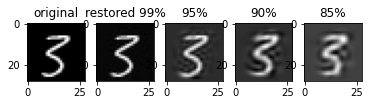

In [17]:
pca = PCA(n_components=0.99,svd_solver='full')
X_transformed = pca.fit_transform(digits.data.astype(float))
X_restored = pca.inverse_transform(X_transformed)

k = 540
fig, ax = plt.subplots(1, 5)
ax[0].imshow(images[k], cmap='gray')
ax[1].imshow(X_restored[k].reshape(28, 28), cmap='gray')
ax[0].set_title('original')
ax[1].set_title('restored 99%')

pca = PCA(n_components=0.95,svd_solver='full')
X_transformed = pca.fit_transform(digits.data.astype(float))
X_restored = pca.inverse_transform(X_transformed)
ax[2].imshow(X_restored[k].reshape(28, 28), cmap='gray')
ax[2].set_title('95%')

pca = PCA(n_components=0.9,svd_solver='full')
X_transformed = pca.fit_transform(digits.data.astype(float))
X_restored = pca.inverse_transform(X_transformed)
ax[3].imshow(X_restored[k].reshape(28, 28), cmap='gray')
ax[3].set_title('90%')

pca = PCA(n_components=0.85,svd_solver='full')
X_transformed = pca.fit_transform(digits.data.astype(float))
X_restored = pca.inverse_transform(X_transformed)
ax[4].imshow(X_restored[k].reshape(28, 28), cmap='gray')
ax[4].set_title('85%')
plt.show()